In [9]:
import numpy as np
from qiskit import Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram
from math import pi, acos, sqrt, sin, asin
from qiskit.tools.visualization import circuit_drawer
import time

%matplotlib inline

In [10]:
def sprinkler(qc,q,a):
    qc.x(q[2])
    qc.x(a[0])
    qc.x(a[1])
    qc.x(a[2])
    qc.ccx(q[0],q[1],a[0])
    qc.ccx(q[1],q[2],a[1])
    qc.ccx(q[0],q[2],a[2])
    qc.mct([a[0],a[1],a[2],q[3]],a[3])
    qc.ccx(q[0],q[2],a[2])
    qc.ccx(q[1],q[2],a[1])
    qc.ccx(q[0],q[1],a[0])
    qc.x(a[2])
    qc.x(a[1])
    qc.x(a[0])
    qc.x(q[2])


In [11]:
def rotations():
    q=QuantumRegister(4)
    qc=QuantumCircuit(q)
    weights=[0.55,0.3,0.7]
    for i in range(len(weights)):
       theta=2.0*asin(sqrt(weights[i]))
       qc.ry(theta,q[i])
    qc.h(q[3])
    return qc

rot=rotations().to_gate()
invrot=rot.inverse()

In [12]:
def grover_circ():
    q=QuantumRegister(4)
    a=QuantumRegister(5)
    qc=QuantumCircuit(q,a)
    qc.x(a[3])
    qc.h(a[3])
    sprinkler(qc,q,a)
    qc.h(a[3])
    qc.x(a[3])
    qc.append(invrot,range(4))    
    for i in range(q.size):
        qc.x(q[i])
    qc.mct([q[0],q[1],q[2],q[3]],a[4])
    qc.z(a[4])
    qc.mct([q[0],q[1],q[2],q[3]],a[4])
    for i in range(q.size):
        qc.x(q[i])
    qc.ry(2*pi,q[0]) 
    qc.append(rot,range(4)) 
    return qc
    
grover = grover_circ().to_gate()

In [13]:
#mpe
q=QuantumRegister(4)
a=QuantumRegister(5)
c=ClassicalRegister(3)

qc=QuantumCircuit(q,a,c)
qc.append(rot, range(4))
qc.append(grover,range(9))
qc.measure([q[0],q[1],q[2]],c)

In [14]:
backend = Aer.get_backend('qasm_simulator')
start = time.time()

job_sim = execute(qc, backend, shots=1000)
end = time.time()
print(end - start)

result_sim = job_sim.result()

0.010863304138183594


In [15]:
counts  = result_sim.get_counts()
newcounts={}
for key, value in counts.items():
    newkey=key[::-1] # reverses the key
    newcounts[newkey]=value
newcounts

{'000': 134,
 '100': 13,
 '010': 4,
 '110': 6,
 '001': 314,
 '101': 392,
 '011': 119,
 '111': 18}

In [16]:
qs={
'101': 356,
'001': 328,
'011': 127,
'000': 148,
'010': 7,
'110': 9,
'111': 12,
'100': 13,
}

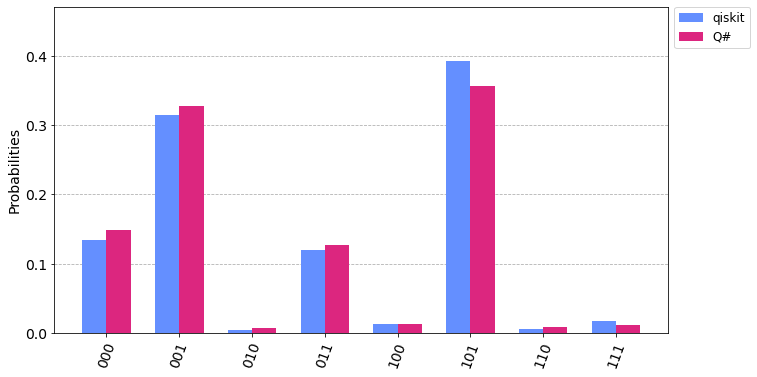

In [17]:
fig=plot_histogram([newcounts,qs],sort='asc',bar_labels=False,legend=['qiskit','Q#'],figsize =(11,6))
fig

In [13]:
fig.savefig("qmpe.pdf", bbox_inches='tight')